## Lending Club Case Study -- solution


**Step 1: Importing Necessary Libraries**

In [2]:
# Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Extra
import warnings
warnings.filterwarnings(action="ignore")

**Step 2: Data Loading**

In [3]:
df_loan = pd.read_csv("loan.csv")

**Step 3: View Top5 records of dataframe**

In [4]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


**Step 4: Check Shape, Info & dtypes details**

In [5]:
print("|------df_loan.shape----------|")
print(df_loan.shape)
print("|------df_loan.info()---------|")
print(df_loan.info())
print("|-----------------------------|")

|------df_loan.shape----------|
(39717, 111)
|------df_loan.info()---------|
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
|-----------------------------|


**Step 5: List out int64 type features from dataFrame**

In [6]:
print("|------int64 type features---------|")
df_loan_int64 = df_loan.select_dtypes(include='int64')
int64_type_features = df_loan_int64.columns
print(int64_type_features)
print("|----------------------------------|")

|------int64 type features---------|
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'policy_code', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')
|----------------------------------|


**Step 6: List out float64 type features from dataFrame**

In [7]:
print("|------float64 type features---------|")
df_loan_float64 = df_loan.select_dtypes(include='float64')
float64_type_features = df_loan_float64.columns
print(float64_type_features)
print("|------------------------------------|")

|------float64 type features---------|
Index(['funded_amnt_inv', 'installment', 'annual_inc', 'dti',
       'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mo

**Step 7: List out object type features from dataFrame**

In [8]:
print("|------object type features---------|")
df_loan_object = df_loan.select_dtypes(include='object')
object_type_features = df_loan_object.columns
print(object_type_features)
print("|-----------------------------------|")

|------object type features---------|
Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')
|-----------------------------------|


**Step 8: Check info() of all int64-type features**

In [9]:
df_loan_int64.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              39717 non-null  int64
 1   member_id       39717 non-null  int64
 2   loan_amnt       39717 non-null  int64
 3   funded_amnt     39717 non-null  int64
 4   delinq_2yrs     39717 non-null  int64
 5   inq_last_6mths  39717 non-null  int64
 6   open_acc        39717 non-null  int64
 7   pub_rec         39717 non-null  int64
 8   revol_bal       39717 non-null  int64
 9   total_acc       39717 non-null  int64
 10  policy_code     39717 non-null  int64
 11  acc_now_delinq  39717 non-null  int64
 12  delinq_amnt     39717 non-null  int64
dtypes: int64(13)
memory usage: 3.9 MB


**Step 9: Check info() of all float64-type features**

In [10]:
df_loan_float64.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   funded_amnt_inv                 39717 non-null  float64
 1   installment                     39717 non-null  float64
 2   annual_inc                      39717 non-null  float64
 3   dti                             39717 non-null  float64
 4   mths_since_last_delinq          14035 non-null  float64
 5   mths_since_last_record          2786 non-null   float64
 6   out_prncp                       39717 non-null  float64
 7   out_prncp_inv                   39717 non-null  float64
 8   total_pymnt                     39717 non-null  float64
 9   total_pymnt_inv                 39717 non-null  float64
 10  total_rec_prncp                 39717 non-null  float64
 11  total_rec_int                   39717 non-null  float64
 12  total_rec_late_fee              

**Step 10: Check info() of all object-type features**

In [11]:
df_loan_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 39717 non-null  object
 1   int_rate             39717 non-null  object
 2   grade                39717 non-null  object
 3   sub_grade            39717 non-null  object
 4   emp_title            37258 non-null  object
 5   emp_length           38642 non-null  object
 6   home_ownership       39717 non-null  object
 7   verification_status  39717 non-null  object
 8   issue_d              39717 non-null  object
 9   loan_status          39717 non-null  object
 10  pymnt_plan           39717 non-null  object
 11  url                  39717 non-null  object
 12  desc                 26775 non-null  object
 13  purpose              39717 non-null  object
 14  title                39706 non-null  object
 15  zip_code             39717 non-null  object
 16  addr

**Step 10: Find the duplicate-rows in the *df_loan* dataFrame**

In [12]:
duplicate_rows_in_df_loan = df_loan.duplicated()
df_loan[duplicate_rows_in_df_loan]

# OBSERVATION: We see that there are zero-duplicated-rows in the df_loan dataFrame

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


**Step 11: Find the number-of-rows in the *df_loan* dataFrame that are empty**

In [13]:
number_of_empty_rows = df_loan.isnull().all(axis=1).sum()
number_of_empty_rows

# OBSERVATION: There are zero-empty-rows in the df_loan dataFrame

np.int64(0)

**Step 12: Find the number-of-features in the *df_loan* dataFrame that are empty**

In [14]:
number_of_empty_features = df_loan.isnull().all(axis=0).sum()
number_of_empty_features

# OBSERVATION: There are 54-empty-features in the df_loan dataFrame

np.int64(54)

**Step 12A: List the features from *df_loan* dataFrame which are empty**

In [15]:
empty_features = [col for col in df_loan.columns if df_loan[col].isnull().all()]
print(empty_features)

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

**Step 12B: Impute the features from *df_loan* dataFrame which are empty**

In [16]:
df_loan.drop(empty_features, axis=1, inplace=True)

**Step 12C: Check the current Shape of *df_loan* dataFrame after imputation**

In [17]:
print("|------current df_loan.shape----------|")
print(df_loan.shape)
print("|-----------------------------|")

# OBSERVATION: 48% of the features are imputed at this point.

|------current df_loan.shape----------|
(39717, 57)
|-----------------------------|


**Step 13: Find number-of-null-values in the features which have int64-dtype**

In [18]:
df_loan_int64 = df_loan.select_dtypes(include='int64')
df_loan_int64.isna().sum()
# null_columns_df_loan_int64 = df_loan_int64.columns[df_loan_int64.isna().any()].to_list()
# null_columns_df_loan_int64

drop_features_df_loan_int64 = []
drop_features_df_loan_int64

[]

**Step 14: List the features which have float64-dtype and have many nulls**

In [19]:
df_loan_float64 = df_loan.select_dtypes(include='float64')
df_loan_float64.isna().sum()
# null_columns_df_loan_float64 = df_loan_float64.columns[df_loan_float64.isna().any()].to_list()
# null_columns_df_loan_float64

drop_features_df_loan_float64 = ['mths_since_last_delinq','mths_since_last_record']
drop_features_df_loan_float64

['mths_since_last_delinq', 'mths_since_last_record']

**Step 15: List the features which have object-dtype and have many nulls**

In [20]:
df_loan_object = df_loan.select_dtypes(include='object')
df_loan_object.isna().sum()
# null_columns_df_loan_object = df_loan_object.columns[df_loan_object.isna().any()].to_list()
# null_columns_df_loan_object

drop_features_df_loan_object = ['desc','next_pymnt_d']
drop_features_df_loan_object

['desc', 'next_pymnt_d']

**Step 16: Drop the above selected features**

In [21]:
df_loan.drop(drop_features_df_loan_int64, axis=1, inplace=True)
df_loan.drop(drop_features_df_loan_float64, axis=1, inplace=True)
df_loan.drop(drop_features_df_loan_object, axis=1, inplace=True)

In [22]:
df_loan.shape

(39717, 53)

**Step 17: Create a dataFrame containing only DEFAULTED-LOAN records from *df_loan* dataFrame**

In [23]:
df_loan.loan_status.unique()

# ASSUMPTION: 'Charged Off' means DEFAULTED.

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [24]:
df_loan_defaulted = df_loan[df_loan["loan_status"]=='Charged Off']

In [25]:
df_loan_defaulted.shape

(5627, 53)

**Step 18: Segregate *df_loan_defaulted* dataFrame into Numerical and Categorical**

In [26]:
df_loan_defaulted_numeric = df_loan_defaulted.select_dtypes(include=['float64','int64'])
df_loan_defaulted_numeric_features = df_loan_defaulted_numeric.columns
print(df_loan_defaulted_numeric_features)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')


In [27]:
df_loan_defaulted_categorical = df_loan_defaulted.select_dtypes(include=['object'])
df_loan_defaulted_categorical_features = df_loan_defaulted_categorical.columns
print(df_loan_defaulted_categorical_features)

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')


**Step 19: Further cleanup of DEFAULTED-Numeric,-Categorical dataFrames values**

In [28]:
# Replace NULL with MEDIAN-value of feature "pub_rec_bankruptcies"

median_pub_rec_bankruptcies = df_loan_defaulted["pub_rec_bankruptcies"].median()
df_loan_defaulted["pub_rec_bankruptcies"] = df_loan_defaulted["pub_rec_bankruptcies"].fillna(median_pub_rec_bankruptcies)


In [29]:
df_loan_defaulted_numeric.isna().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
installment                     0
annual_inc                      0
dti                             0
delinq_2yrs                     0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
total_acc                       0
out_prncp                       0
out_prncp_inv                   0
total_pymnt                     0
total_pymnt_inv                 0
total_rec_prncp                 0
total_rec_int                   0
total_rec_late_fee              0
recoveries                      0
collection_recovery_fee         0
last_pymnt_amnt                 0
collections_12_mths_ex_med      6
policy_code                     0
acc_now_delinq                  0
chargeoff_within_12_mths        6
delinq_amnt                     0
pub_rec_bankru

In [30]:
df_loan_defaulted_categorical.isna().sum()

term                     0
int_rate                 0
grade                    0
sub_grade                0
emp_title              484
emp_length             228
home_ownership           0
verification_status      0
issue_d                  0
loan_status              0
pymnt_plan               0
url                      0
purpose                  0
title                    2
zip_code                 0
addr_state               0
earliest_cr_line         0
revol_util              16
initial_list_status      0
last_pymnt_d            71
last_credit_pull_d       1
application_type         0
dtype: int64

In [31]:
df_loan_defaulted_categorical.emp_length.head()

1     < 1 year
8      4 years
9     < 1 year
12    < 1 year
14     3 years
Name: emp_length, dtype: object

**Step 20: Histograms for Numerical-Features (Univariate)**

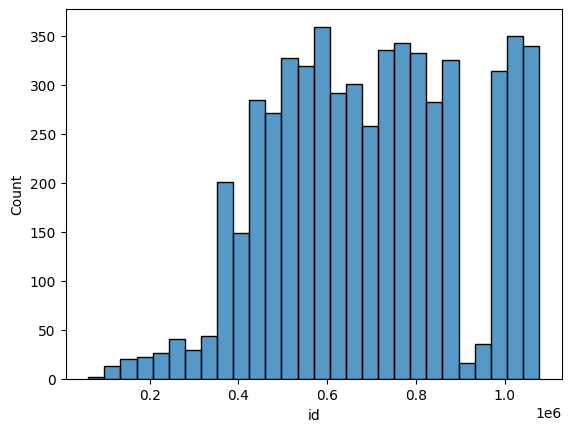

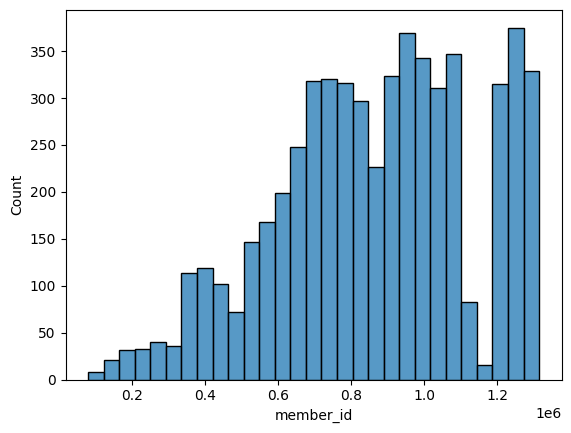

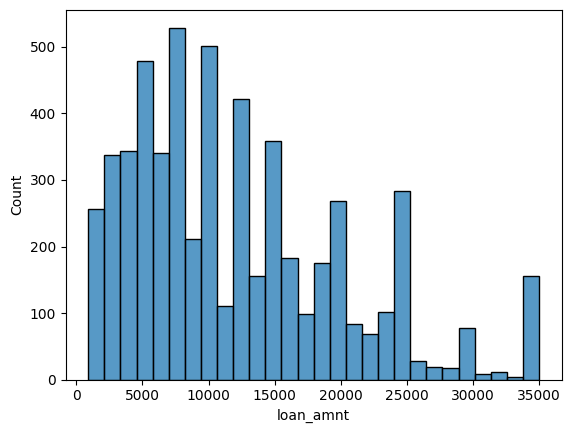

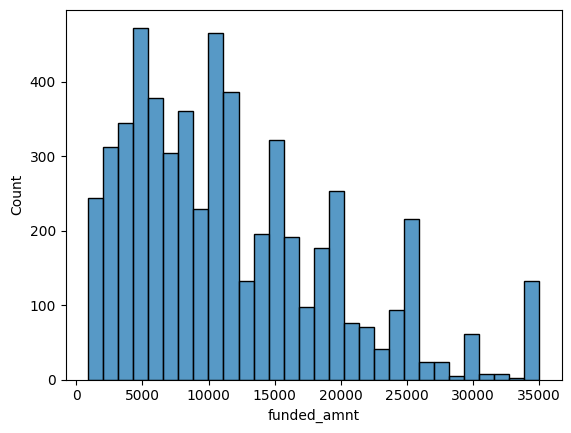

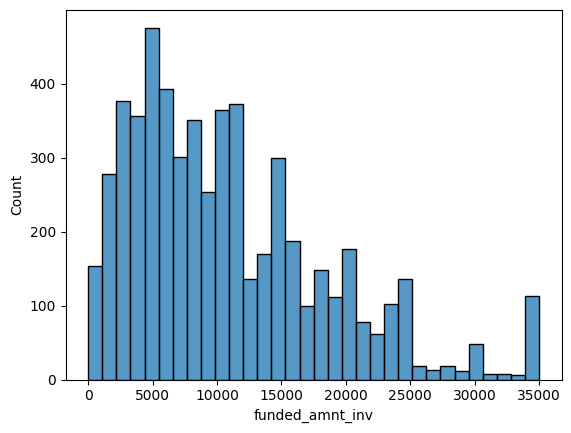

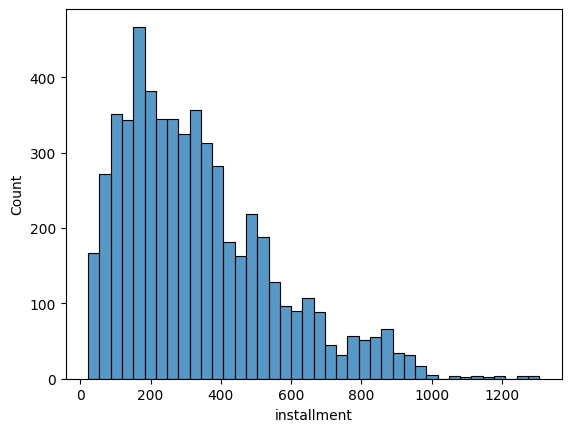

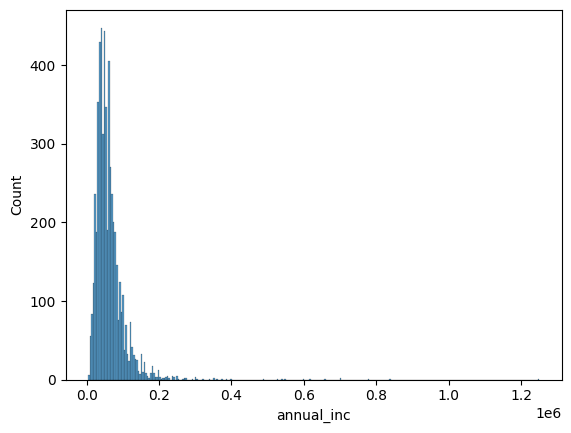

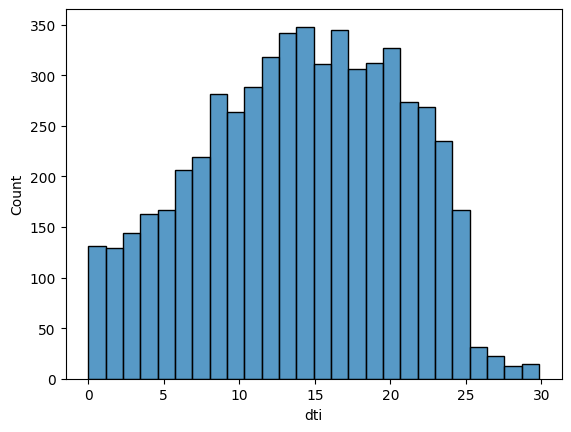

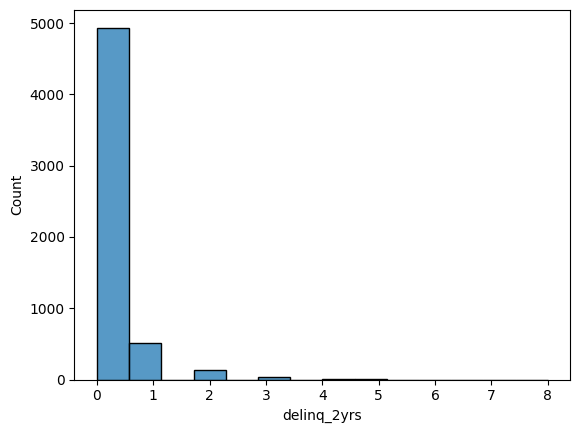

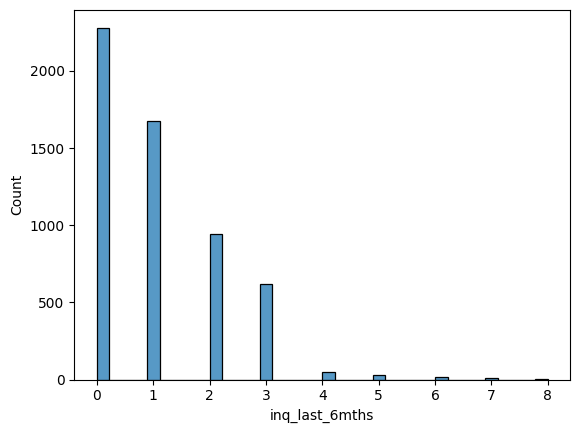

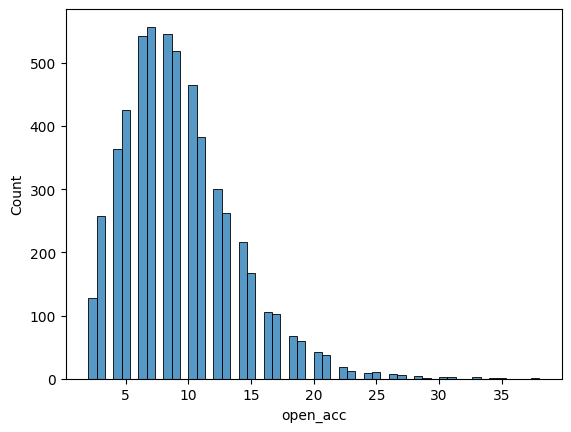

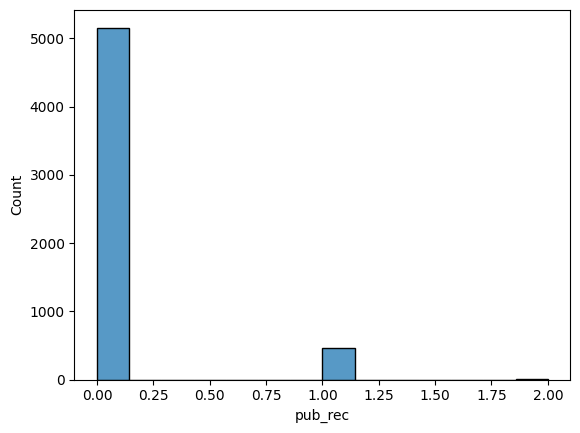

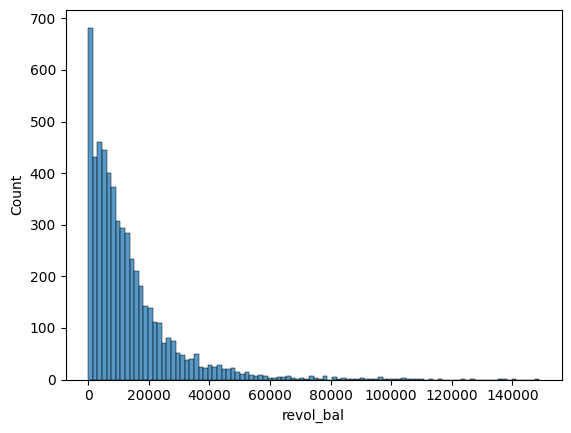

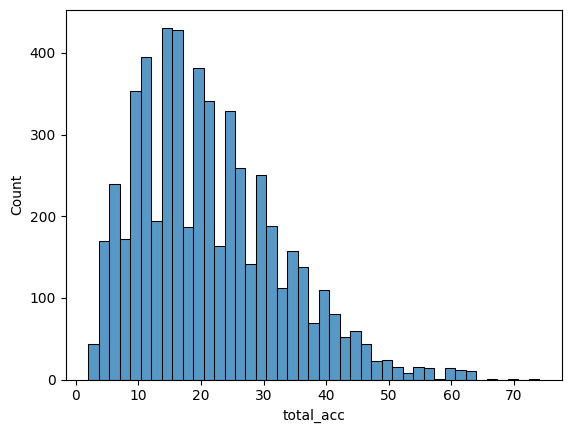

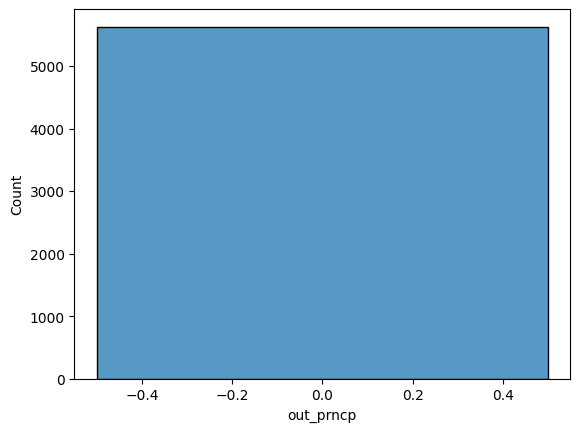

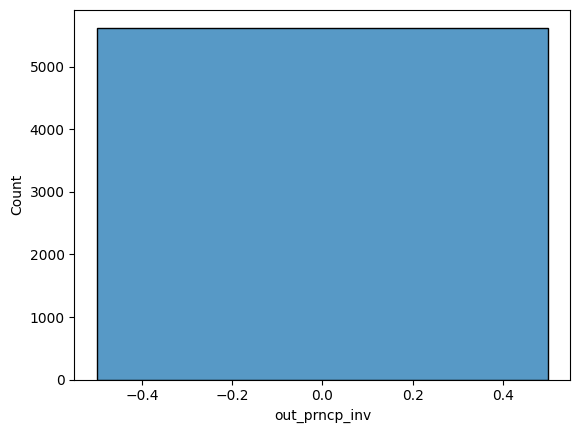

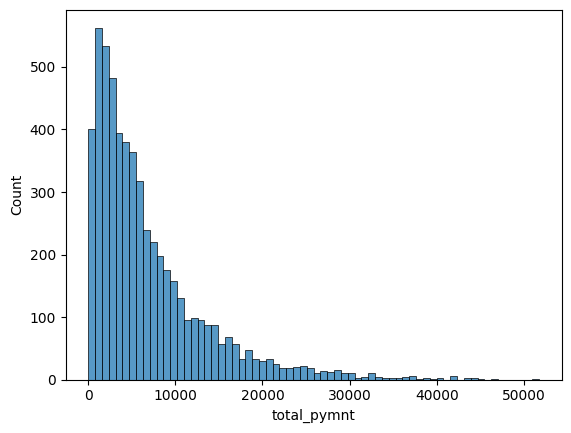

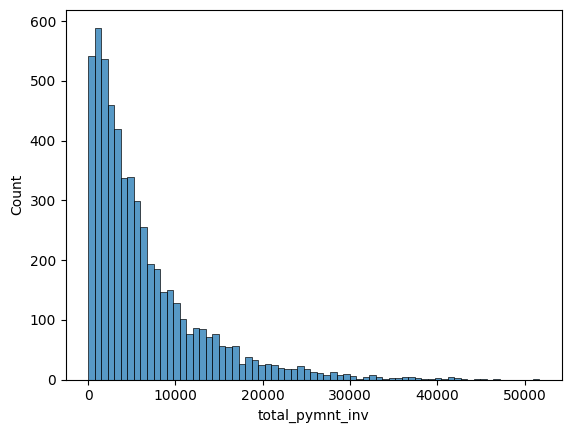

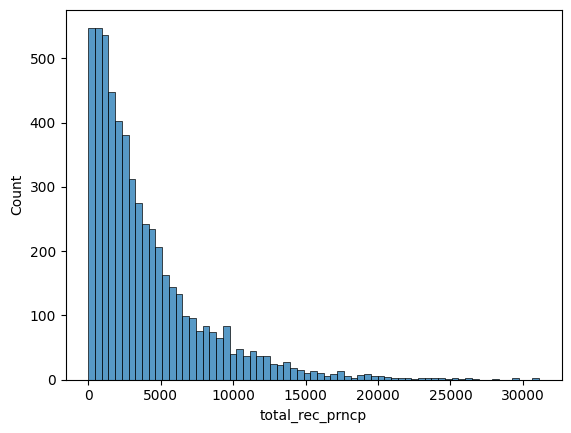

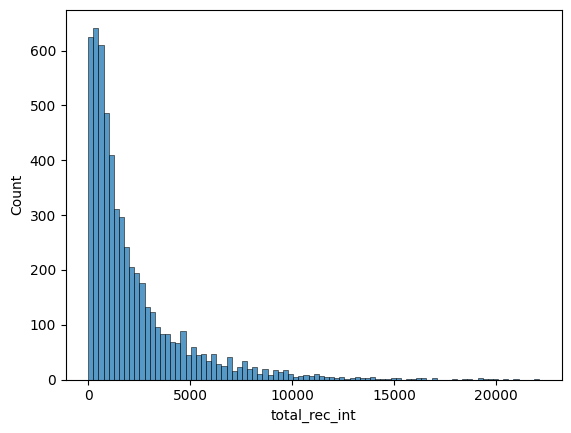

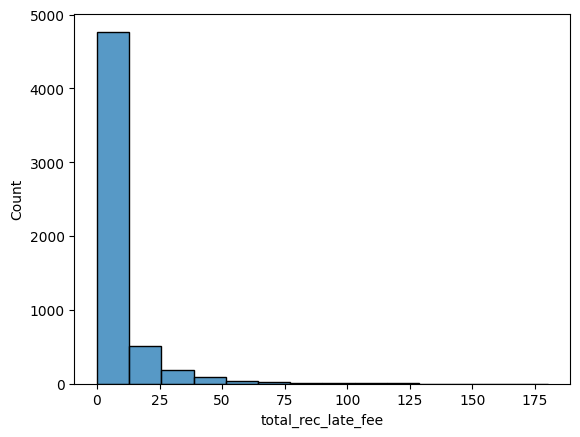

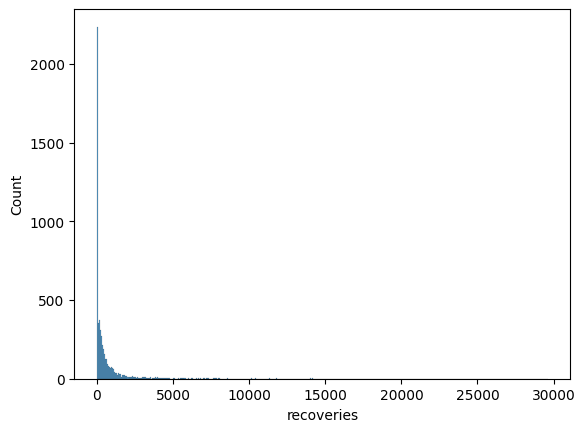

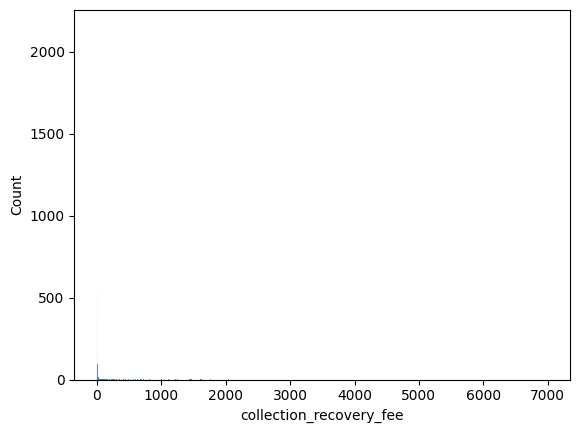

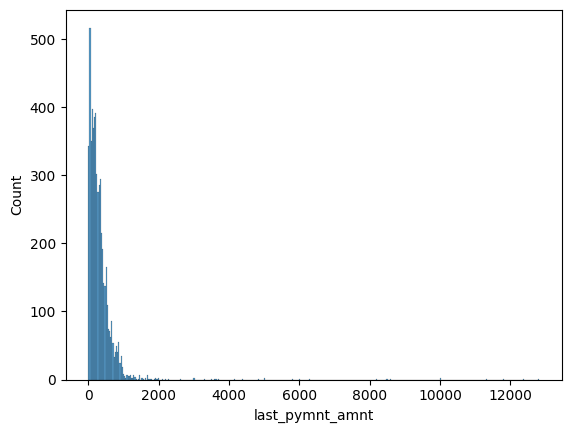

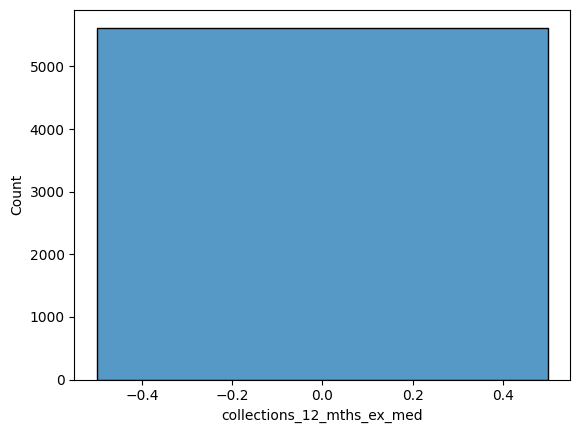

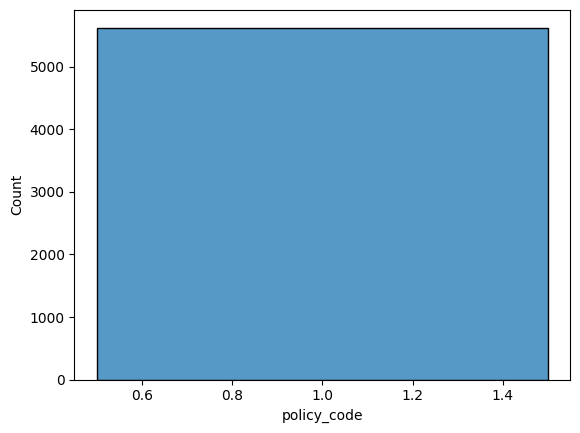

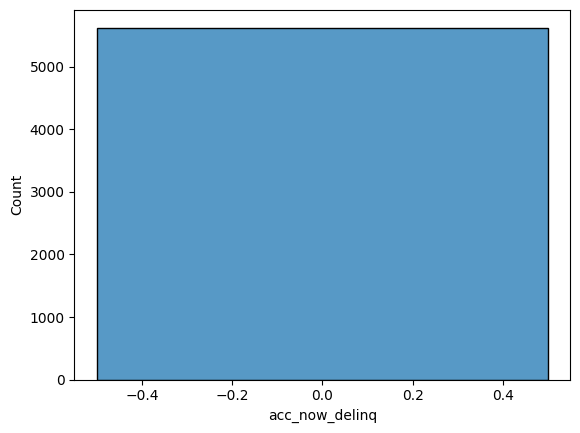

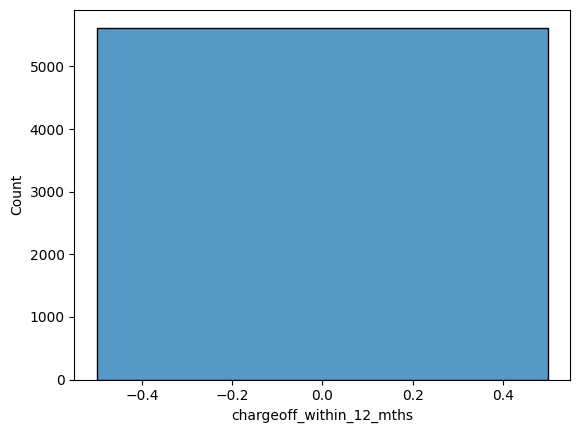

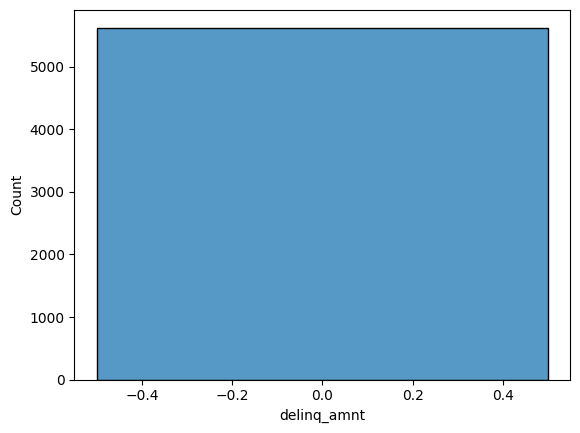

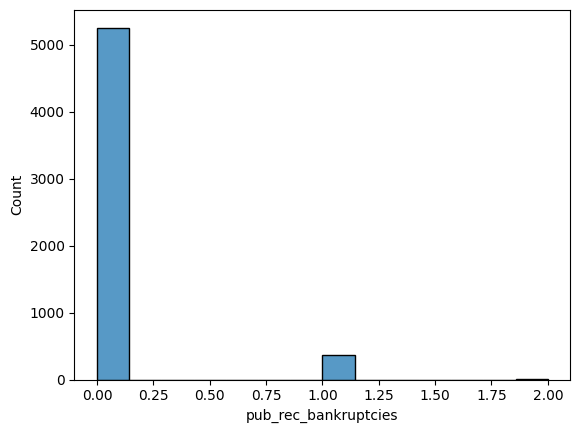

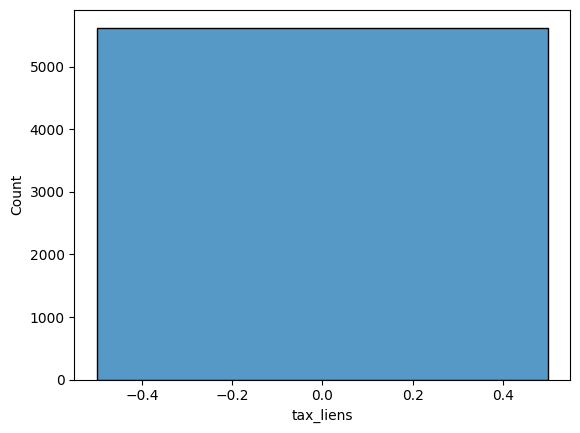

In [32]:
for col in df_loan_defaulted_numeric_features:
    sns.histplot(x=df_loan_defaulted[col])
    plt.show()

**Step 21: Boxplots for Numerical-Features (Univariate)**

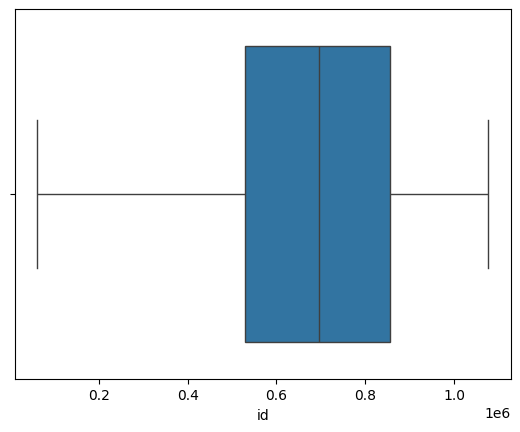

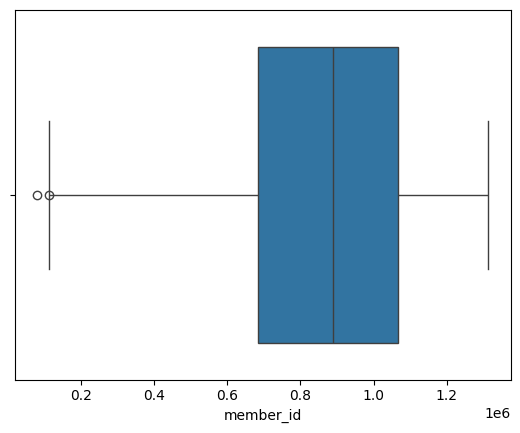

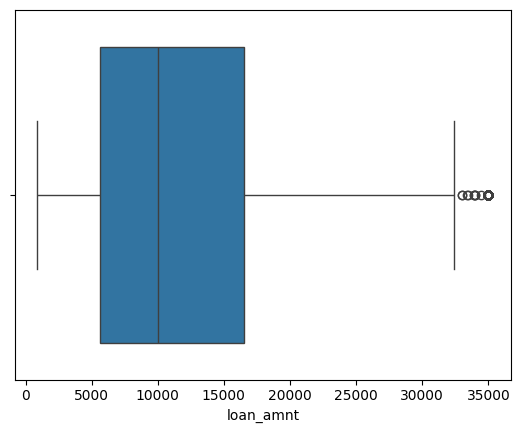

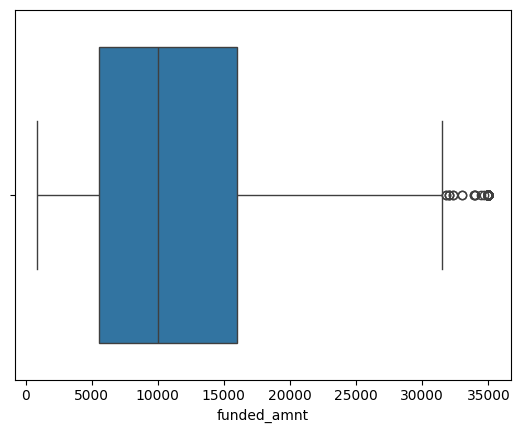

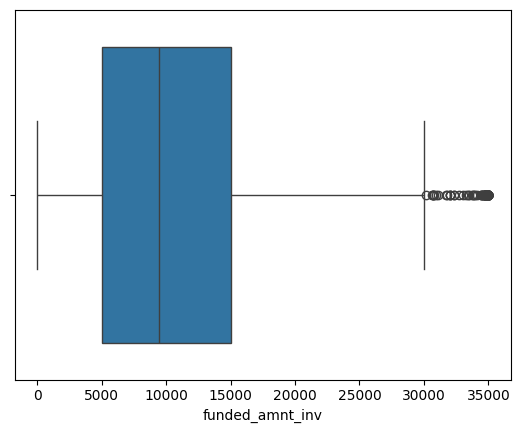

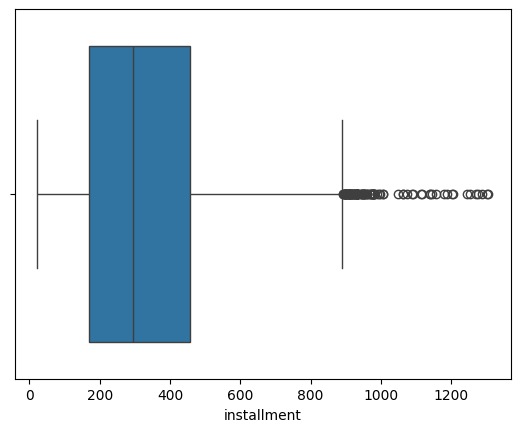

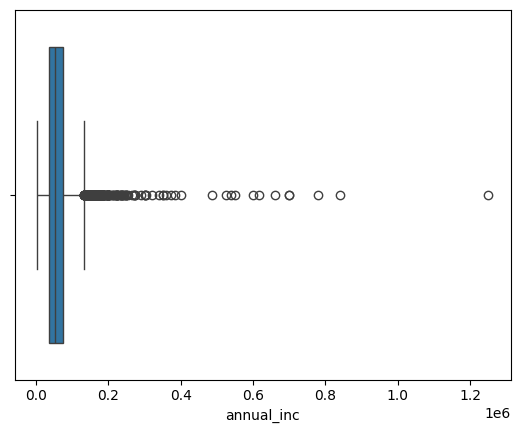

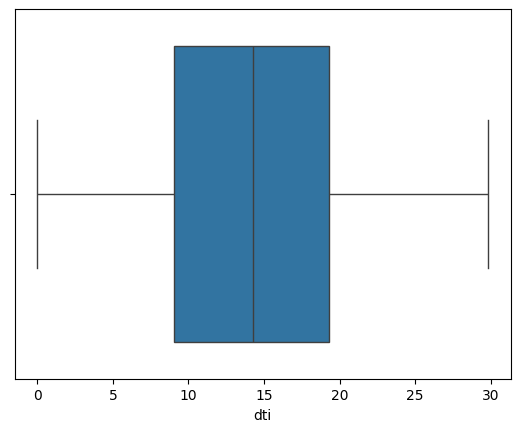

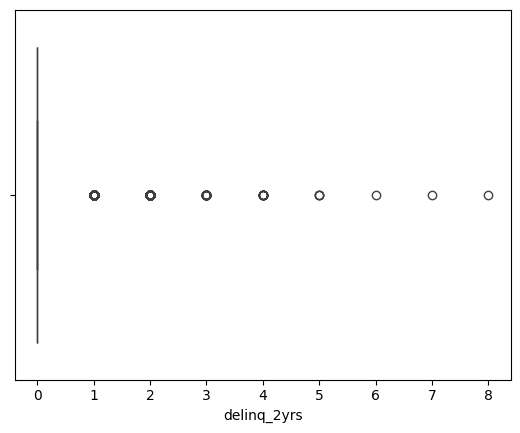

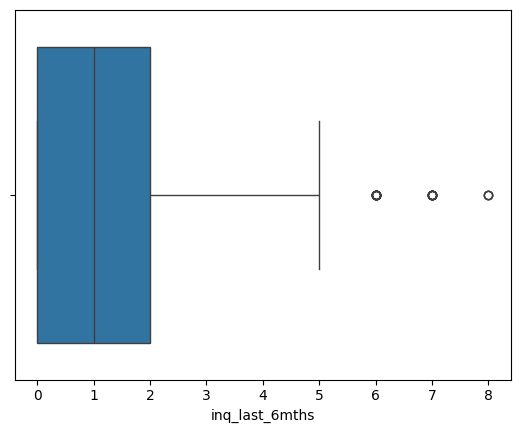

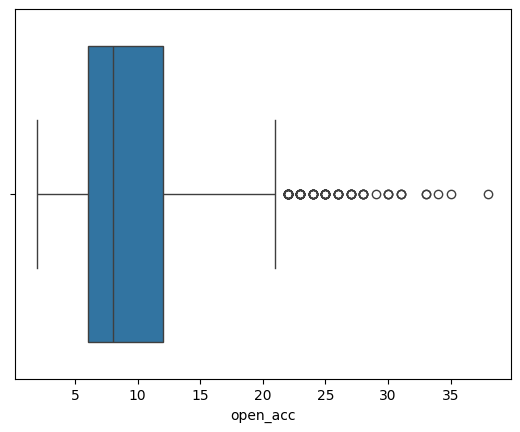

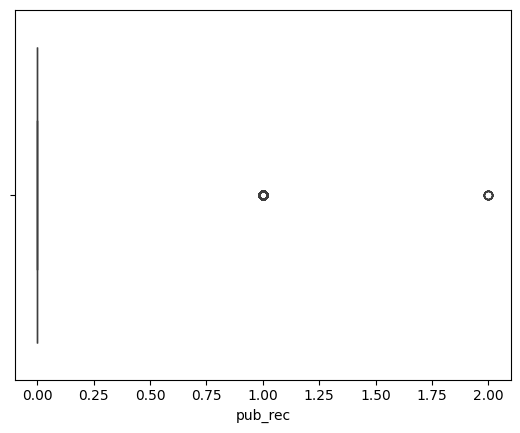

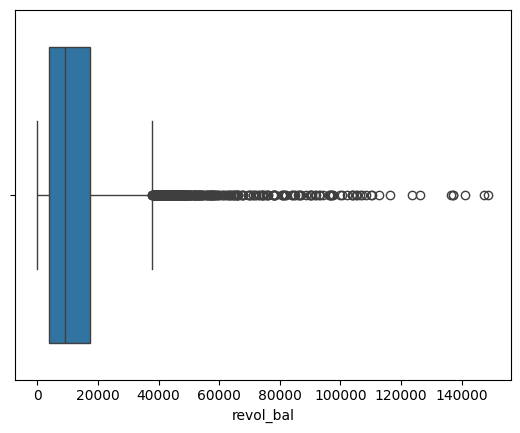

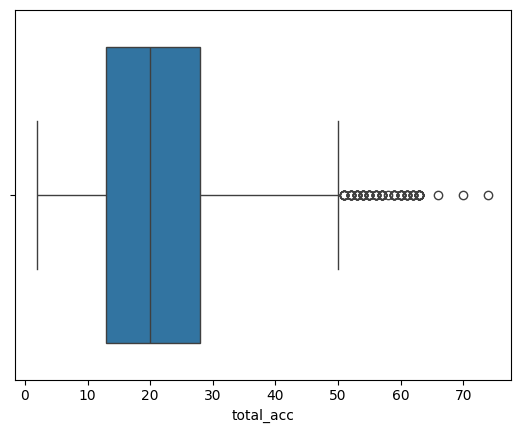

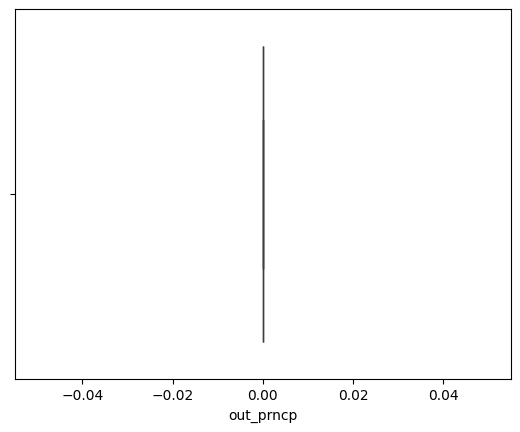

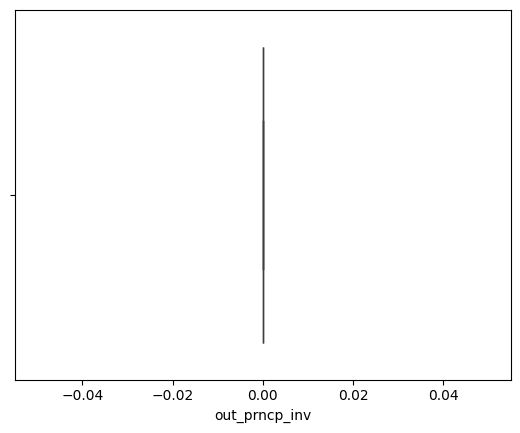

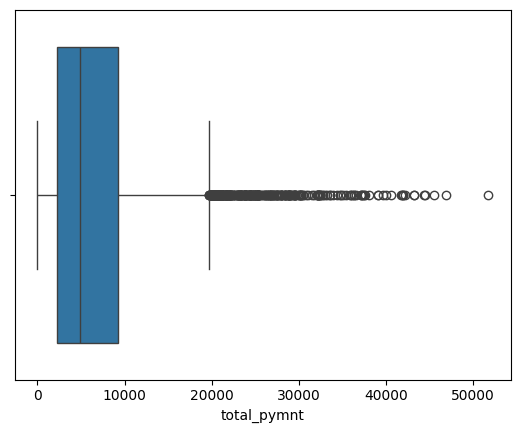

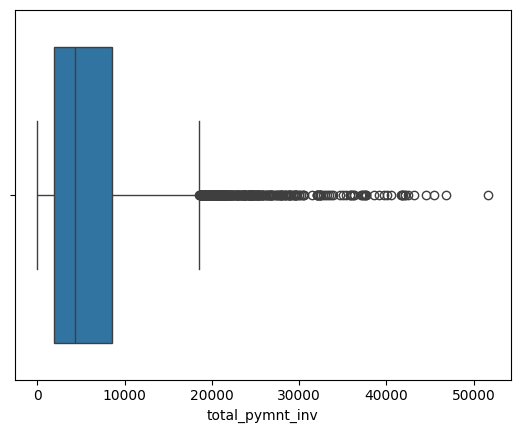

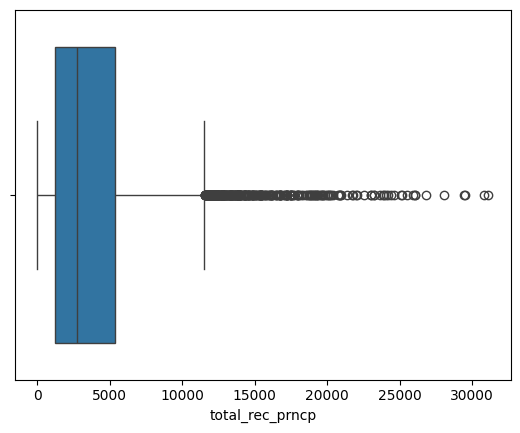

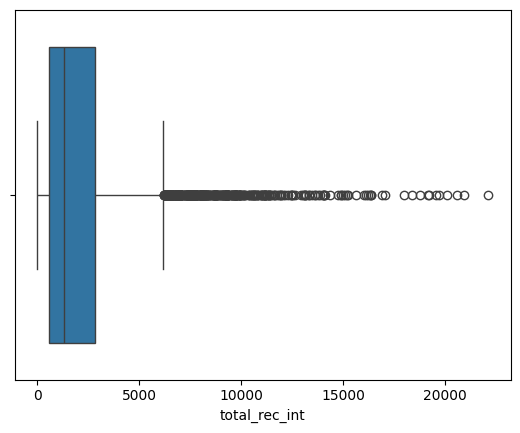

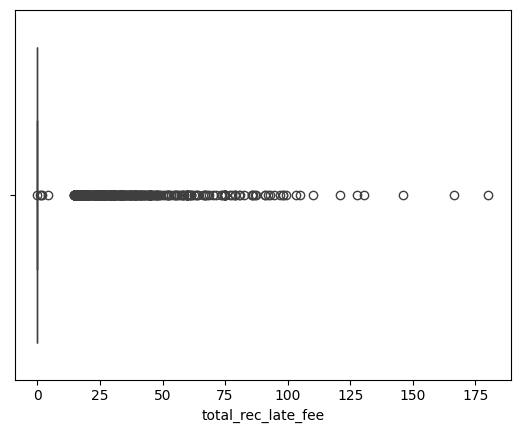

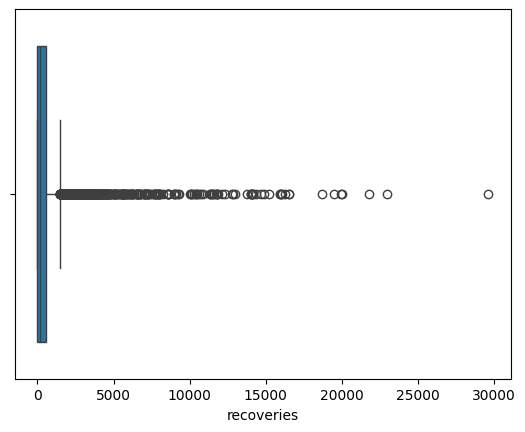

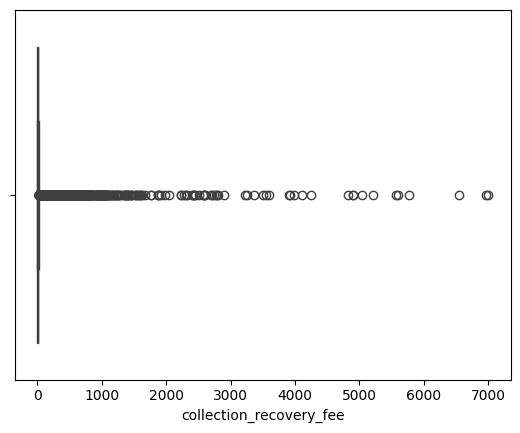

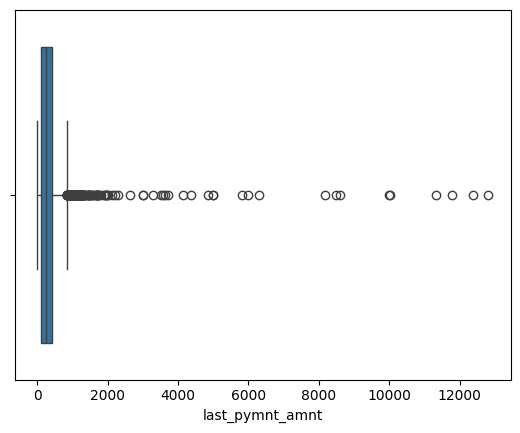

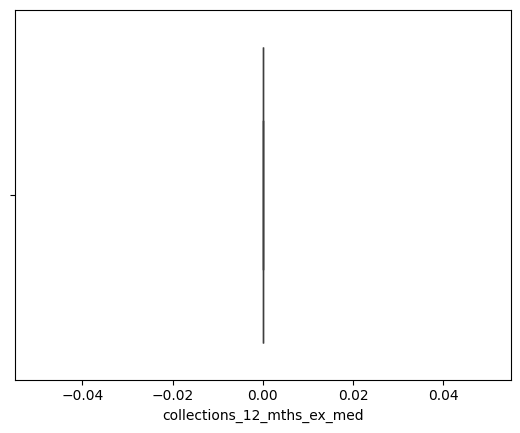

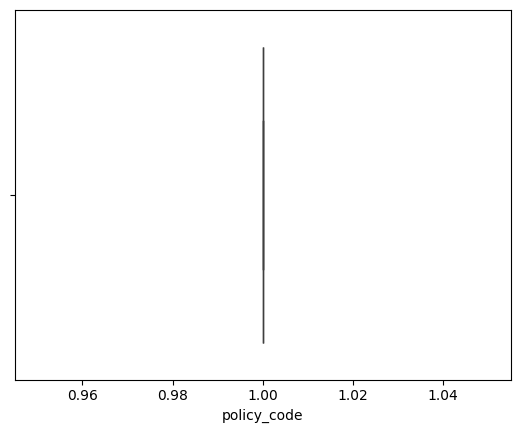

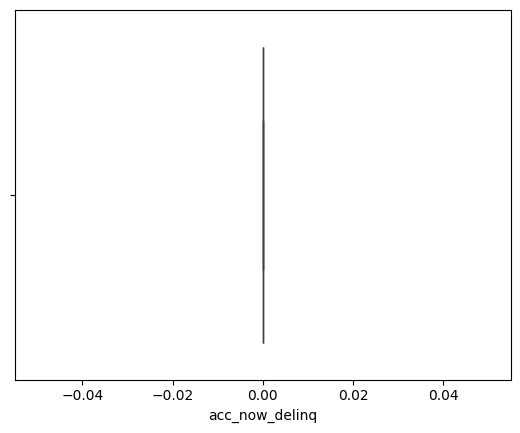

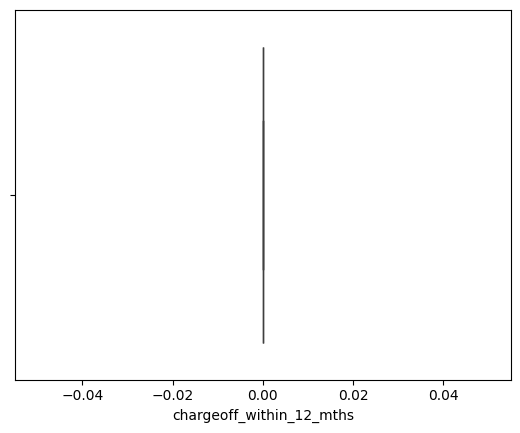

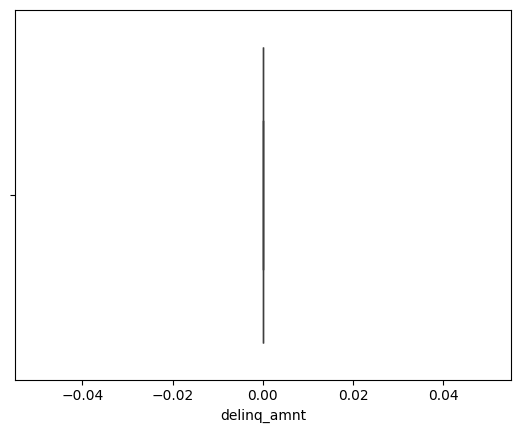

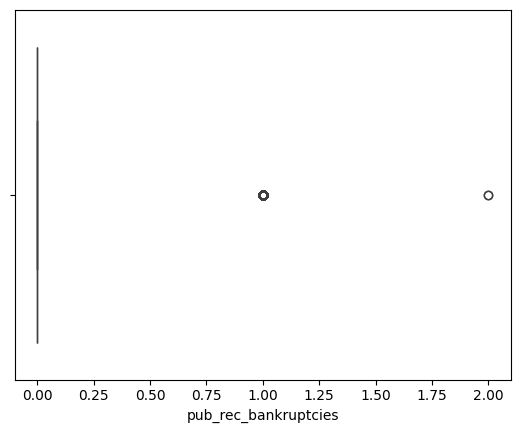

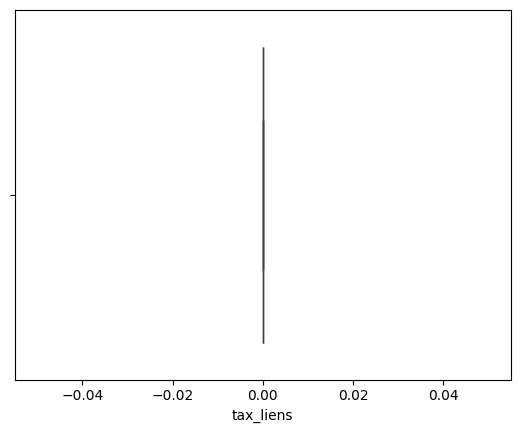

In [33]:
for col in df_loan_defaulted_numeric_features:
    sns.boxplot(x=df_loan_defaulted[col])
    plt.show()

**Step 22: Countplots for Categorical-Features (Univariate)**

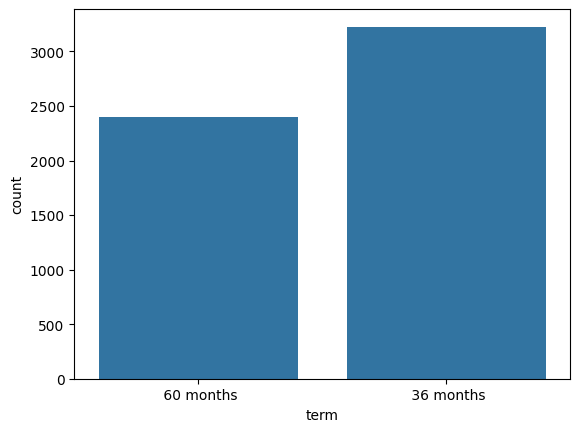

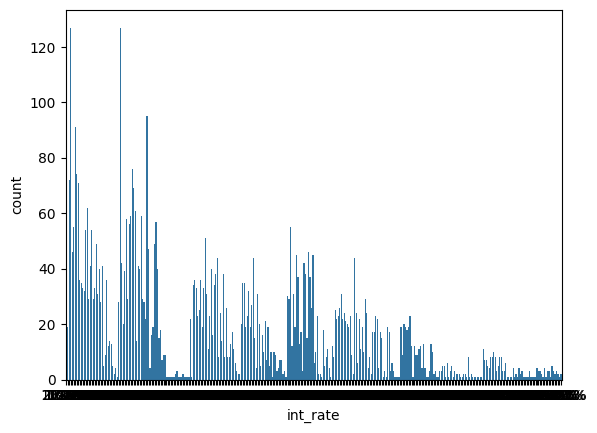

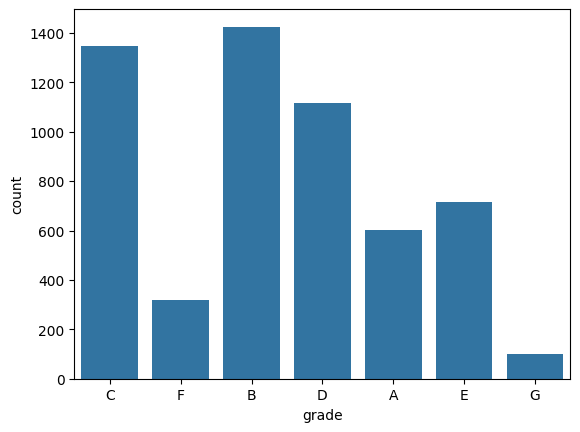

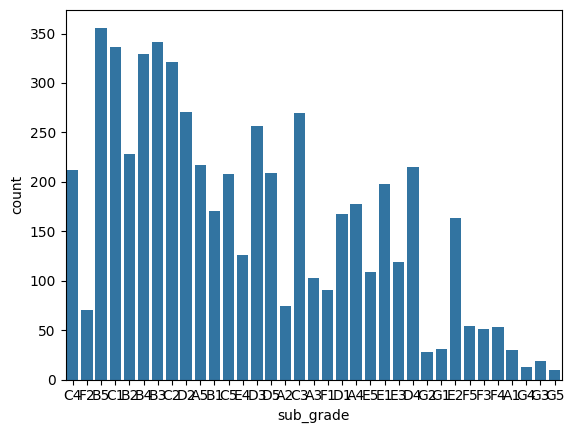

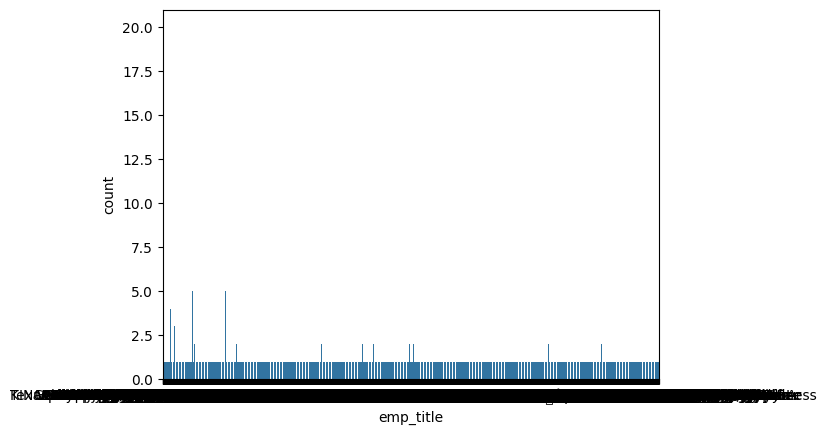

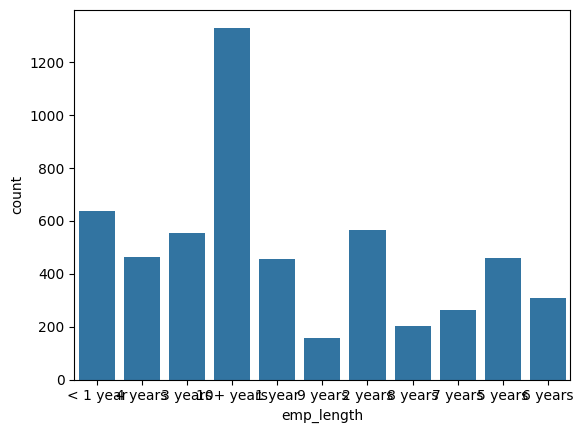

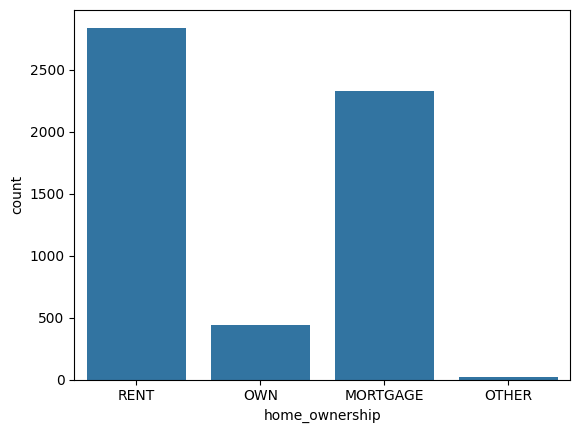

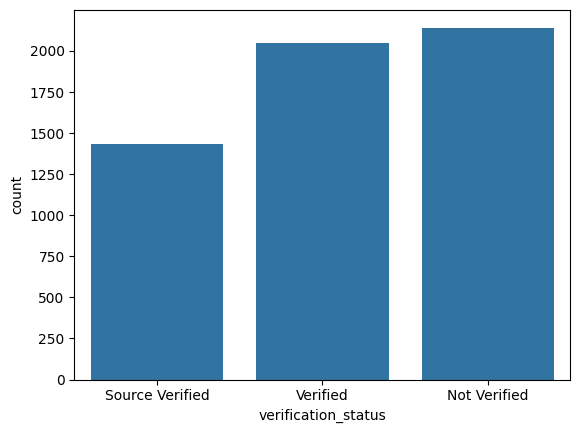

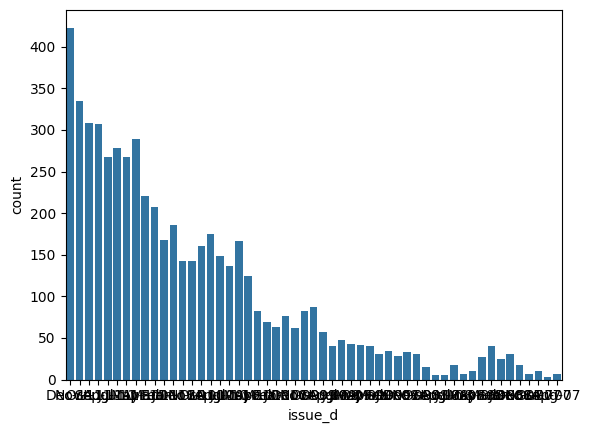

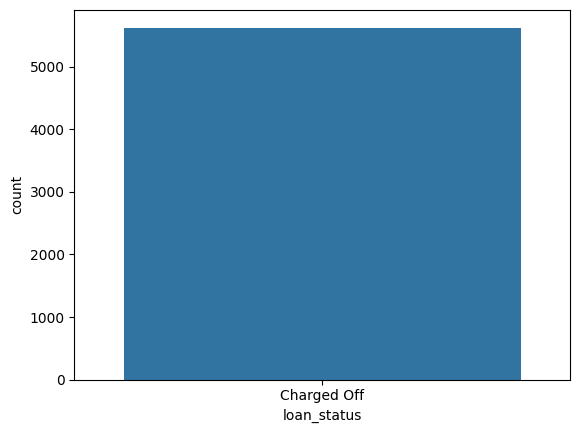

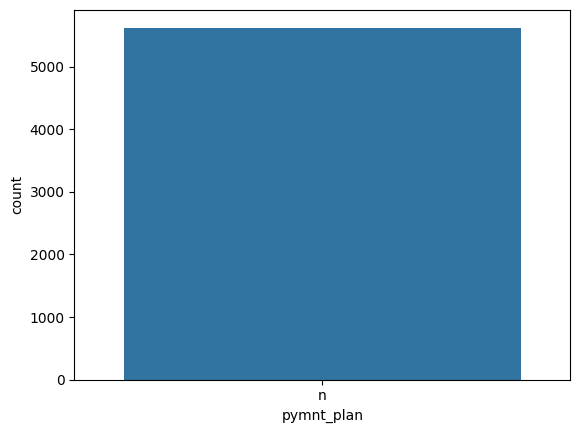

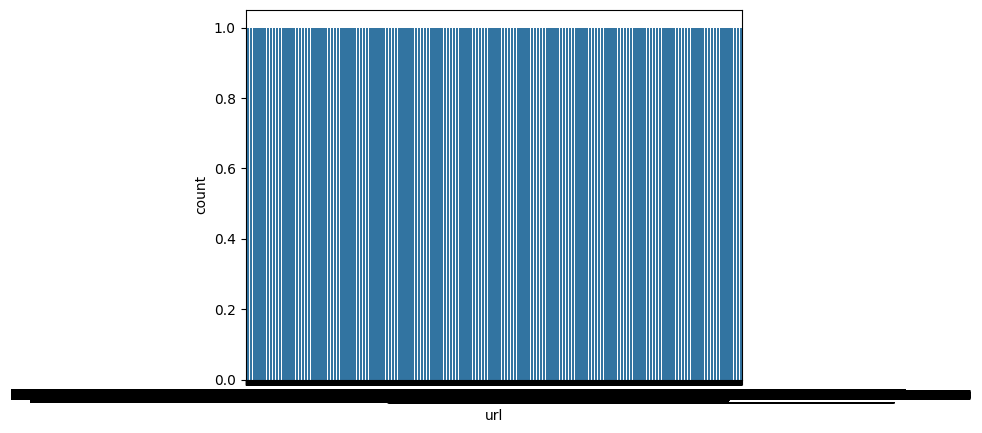

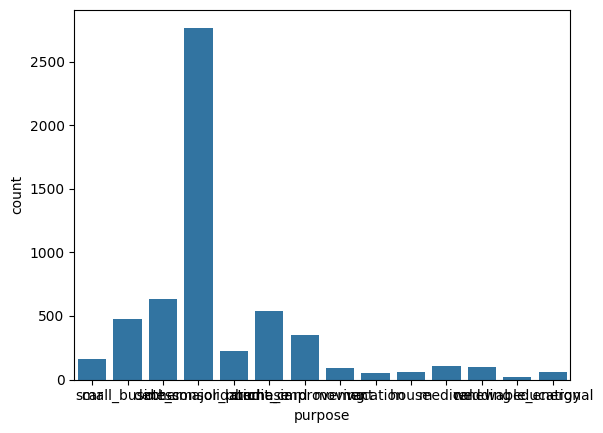

ValueError: 
Hi-Incm Trader,3-Yr $12K Loan,14.96%,$415.74/Mo.
                    ^
ParseException: Expected end of text, found '$'  (at char 20), (line:1, col:21)

<Figure size 640x480 with 1 Axes>

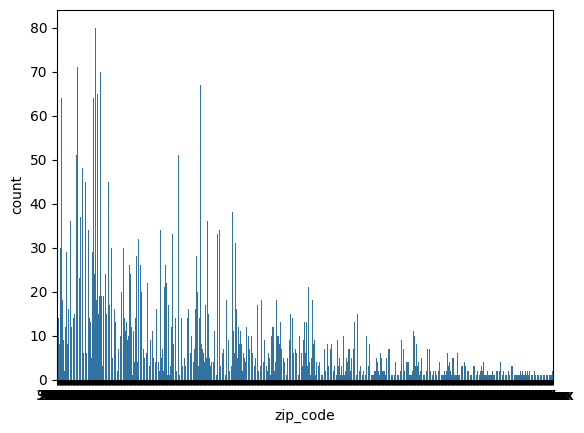

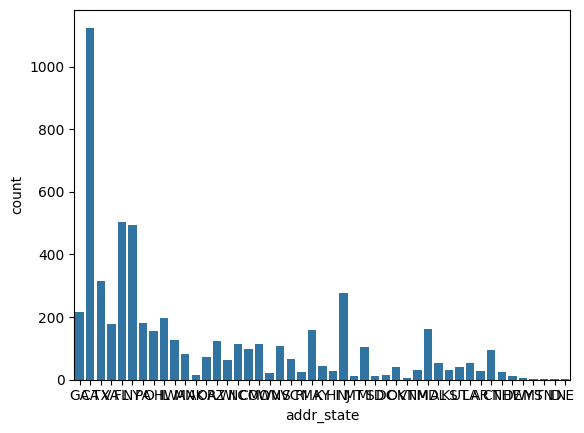

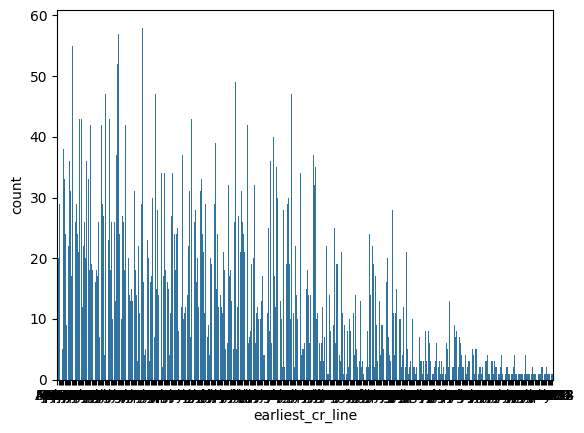

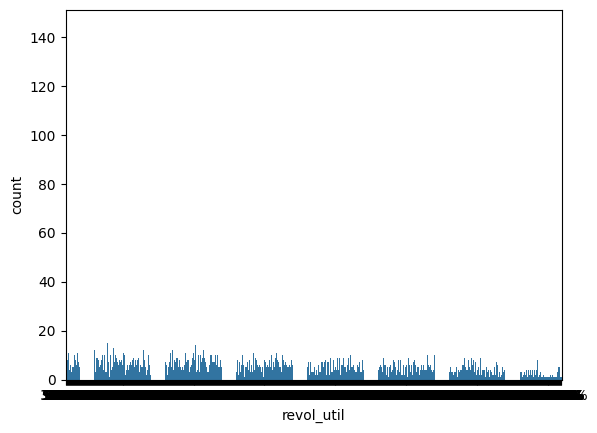

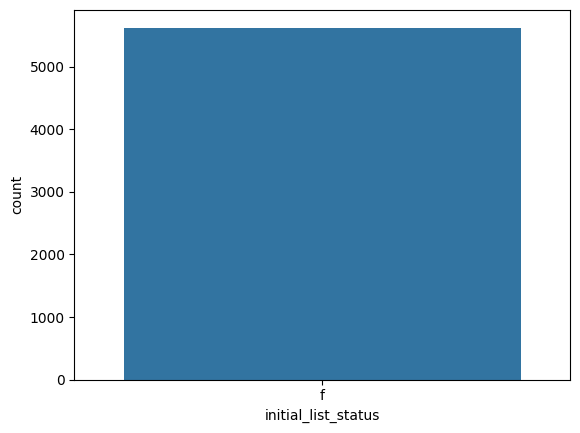

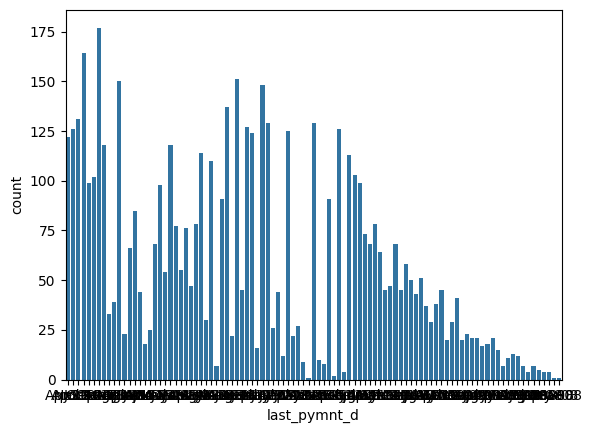

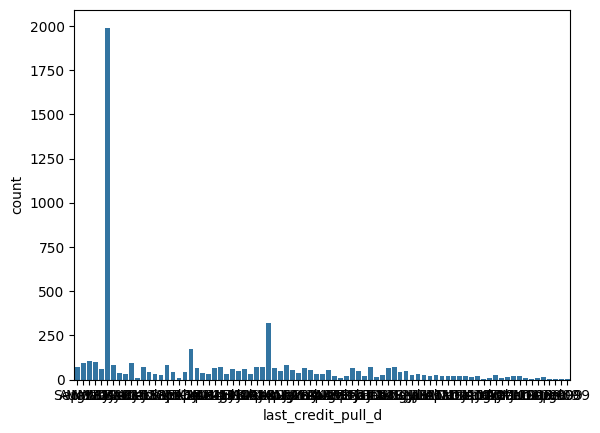

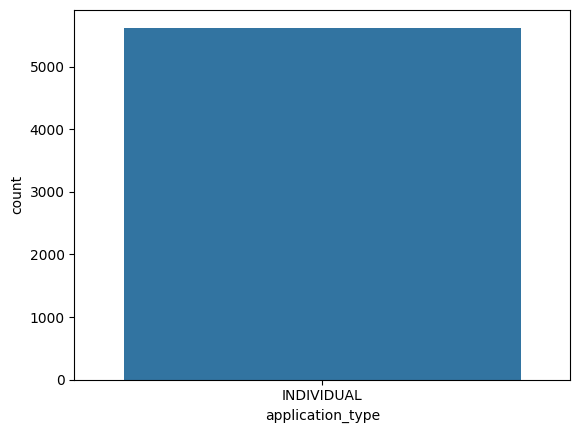

In [34]:
for col in df_loan_defaulted_categorical_features:
    sns.countplot(x=df_loan_defaulted[col])
    plt.show()